In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
dataset = pd.read_csv(r"F:\Body fitness\25.csv")

In [5]:
dataset

,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,5464,200,181,5,0,66
1,6041,100,197,8,0,66
2,25,100,0,5,0,66
3,5461,100,174,4,0,66
4,6915,200,223,5,500,66
...,...,...,...,...,...,...
91,133,100,4,2,0,64
92,153,300,0,8,0,64
93,500,200,0,5,500,64
94,2127,200,0,5,0,64


In [6]:
dataset.isnull().any()

step_count         False
mood               False
calories_burned    False
hours_of_sleep     False
bool_of_active     False
weight_kg          False
dtype: bool

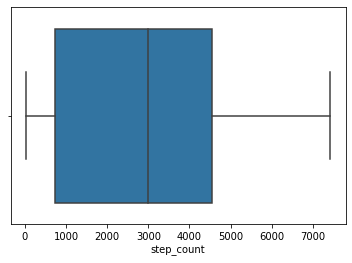

In [7]:
sns.boxplot(dataset['step_count'])

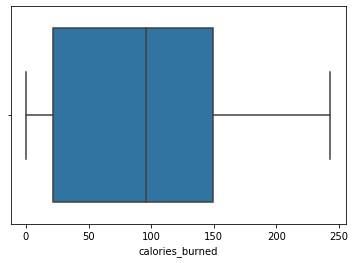

In [8]:
sns.boxplot(dataset['calories_burned'])

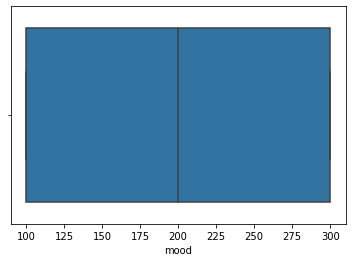

In [9]:
sns.boxplot(dataset['mood'])

In [10]:
x=dataset.iloc[:,0:5].values
y=dataset.iloc[:,5:6].values

In [11]:
x.shape

(96, 5)

In [12]:
y.shape

(96, 1)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
x_train.shape

(76, 5)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

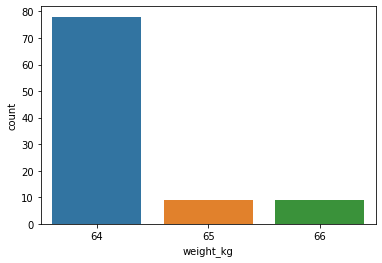

In [16]:
sns.countplot(x="weight_kg",data=dataset)

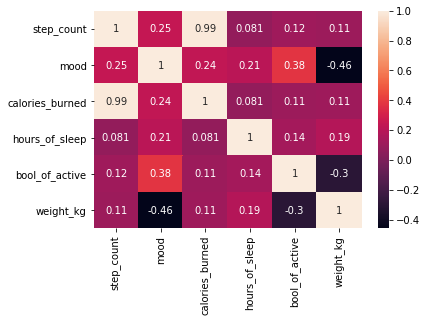

In [17]:
sns.heatmap(dataset.corr(),annot=True)

In [18]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_train,y_train)

C:\Users\ESHWAR\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
lpred=logistic.predict(x_test)

In [20]:
lpred

array([64, 64, 64, 64, 64, 64, 65, 64, 66, 64, 64, 64, 64, 65, 65, 64, 64,
       64, 64, 64], dtype=int64)

In [21]:
y_test

array([[64],
       [64],
       [66],
       [64],
       [64],
       [64],
       [65],
       [64],
       [64],
       [64],
       [64],
       [64],
       [64],
       [65],
       [66],
       [64],
       [64],
       [64],
       [64],
       [66]], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score
laccuracy=accuracy_score(y_test,lpred)

In [23]:
laccuracy

0.8

In [24]:
from sklearn.metrics import confusion_matrix
lcm=confusion_matrix(y_test,lpred)

In [25]:
lcm

array([[14,  0,  1],
       [ 0,  2,  0],
       [ 2,  1,  0]], dtype=int64)

In [26]:
x_test.shape

(20, 5)

Text(0.5, 0, 'false positive rate')

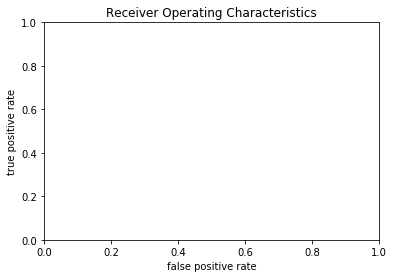

In [27]:
import matplotlib.pyplot as plt
plt.title("Receiver Operating Characteristics")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")

In [28]:
lp=logistic.predict([[5464,200,181,5,0]])

In [29]:
lp

array([66], dtype=int64)

In [30]:
lp=logistic.predict([[133,100,4,2,0]])

In [31]:
lp

array([64], dtype=int64)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(x_train,y_train)

C:\Users\ESHWAR\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
kpred=knn.predict(x_test)

In [34]:
kpred

array([64, 64, 64, 64, 64, 64, 65, 64, 64, 64, 64, 64, 64, 66, 65, 64, 64,
       64, 64, 64], dtype=int64)

In [35]:
y_test

array([[64],
       [64],
       [66],
       [64],
       [64],
       [64],
       [65],
       [64],
       [64],
       [64],
       [64],
       [64],
       [64],
       [65],
       [66],
       [64],
       [64],
       [64],
       [64],
       [66]], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score
kaccuracy=accuracy_score(y_test,kpred)

In [37]:
kaccuracy

0.8

In [38]:
from sklearn.metrics import confusion_matrix
kcm=confusion_matrix(y_test,kpred)

In [39]:
kcm

array([[15,  0,  0],
       [ 0,  1,  1],
       [ 2,  1,  0]], dtype=int64)

No handles with labels found to put in legend.


Text(0.5, 0, 'false positive rate')

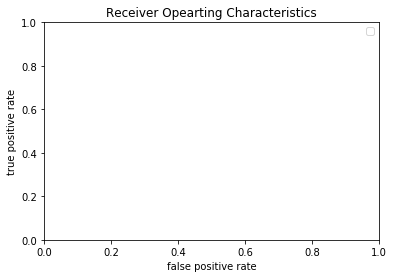

In [40]:
import matplotlib.pyplot as plt
plt.title("Receiver Opearting Characteristics")
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")


In [41]:
kp=knn.predict([[133,100,4,2,0]])

In [42]:
kp

array([64], dtype=int64)

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',splitter='best')

In [44]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
dpred=dt.predict(x_test)

In [46]:
dpred

array([64, 64, 64, 65, 64, 64, 64, 65, 66, 64, 64, 64, 64, 66, 65, 64, 64,
       65, 64, 64], dtype=int64)

In [47]:
y_test

array([[64],
       [64],
       [66],
       [64],
       [64],
       [64],
       [65],
       [64],
       [64],
       [64],
       [64],
       [64],
       [64],
       [65],
       [66],
       [64],
       [64],
       [64],
       [64],
       [66]], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score
daccuracy=accuracy_score(y_test,dpred)

In [49]:
daccuracy

0.55

In [50]:
from sklearn.metrics import confusion_matrix
dcm=confusion_matrix(y_test,dpred)

In [51]:
dcm

array([[11,  3,  1],
       [ 1,  0,  1],
       [ 2,  1,  0]], dtype=int64)

Text(0.5, 0, 'false positive rate')

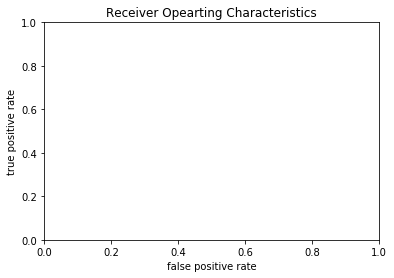

In [52]:
import matplotlib.pyplot as plt
plt.title("Receiver Opearting Characteristics")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")


In [53]:
pred=dt.predict([[133,100,4,2,0]])

In [54]:
pred

array([64], dtype=int64)

In [55]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(x_train,y_train)

C:\Users\ESHWAR\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
npred=naive.predict(x_test)

In [57]:
npred

array([64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 66, 65, 64, 64,
       64, 64, 64], dtype=int64)

In [58]:
y_test

array([[64],
       [64],
       [66],
       [64],
       [64],
       [64],
       [65],
       [64],
       [64],
       [64],
       [64],
       [64],
       [64],
       [65],
       [66],
       [64],
       [64],
       [64],
       [64],
       [66]], dtype=int64)

In [59]:
naccuracy=accuracy_score(y_test,npred)

In [60]:
naccuracy

0.75

In [61]:
ncm=confusion_matrix(y_test,npred)

In [62]:
ncm

array([[15,  0,  0],
       [ 1,  0,  1],
       [ 2,  1,  0]], dtype=int64)

Text(0.5, 0, 'false positive rate')

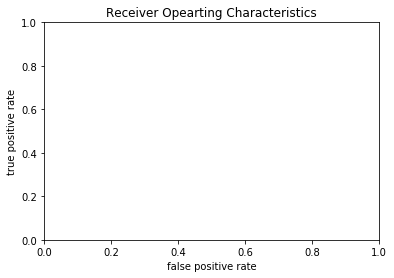

In [63]:
import matplotlib.pyplot as plt
plt.title("Receiver Opearting Characteristics")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")

In [64]:
np=naive.predict([[133,100,4,2,0]])

In [65]:
np

array([64], dtype=int64)

In [66]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10,criterion = "entropy",random_state = 0 )
random.fit(x_train,y_train)

C:\Users\ESHWAR\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [67]:
rpred = random.predict(x_test)

In [68]:
rpred

array([64, 64, 64, 64, 64, 64, 64, 65, 66, 64, 64, 64, 64, 66, 64, 64, 64,
       64, 64, 64], dtype=int64)

In [69]:
y_test

array([[64],
       [64],
       [66],
       [64],
       [64],
       [64],
       [65],
       [64],
       [64],
       [64],
       [64],
       [64],
       [64],
       [65],
       [66],
       [64],
       [64],
       [64],
       [64],
       [66]], dtype=int64)

In [70]:
raccuracy=accuracy_score(y_test,rpred)

In [71]:
raccuracy

0.65

In [72]:
rcm=confusion_matrix(y_test,rpred)

In [73]:
rcm

array([[13,  1,  1],
       [ 1,  0,  1],
       [ 3,  0,  0]], dtype=int64)

Text(0.5, 0, 'false positive rate')

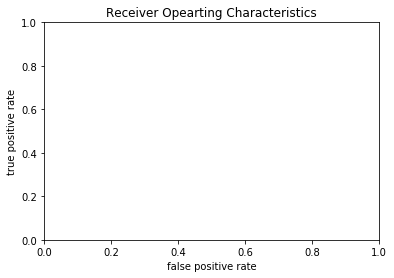

In [74]:
import matplotlib.pyplot as plt
plt.title("Receiver Opearting Characteristics")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")

In [75]:
rp=random.predict([[133,100,4,2,0]])

In [76]:
rp

array([64], dtype=int64)

In [77]:
from sklearn.svm import SVC
svm=SVC(kernel="linear")
svm.fit(x_train,y_train)


C:\Users\ESHWAR\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [78]:
spred=svm.predict(x_test)

In [79]:
spred

array([64, 64, 64, 64, 64, 64, 65, 64, 66, 64, 64, 64, 64, 66, 65, 64, 64,
       64, 64, 64], dtype=int64)

In [80]:
y_test

array([[64],
       [64],
       [66],
       [64],
       [64],
       [64],
       [65],
       [64],
       [64],
       [64],
       [64],
       [64],
       [64],
       [65],
       [66],
       [64],
       [64],
       [64],
       [64],
       [66]], dtype=int64)

In [81]:
saccuracy=accuracy_score(y_test,spred)

In [82]:
saccuracy

0.75

In [83]:
scm=confusion_matrix(y_test,spred)

In [84]:
scm

array([[14,  0,  1],
       [ 0,  1,  1],
       [ 2,  1,  0]], dtype=int64)

Text(0.5, 0, 'False possitive rate')

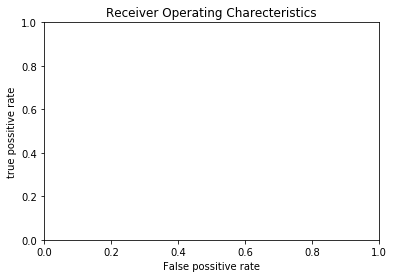

In [85]:
import matplotlib.pyplot as plt
plt.title("Receiver Operating Charecteristics")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("true possitive rate")
plt.xlabel("False possitive rate")

In [86]:
sp=svm.predict([[133,100,4,2,0]])

In [87]:
sp

array([64], dtype=int64)

In [88]:
import pickle
pickle.dump(logistic,open("weight.pkl","wb"))